In [46]:
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import BSpline, interp1d
%matplotlib inline

In [142]:
class PID:

    def __init__(self, P=1.0, I=0.8, D=0.001, current_time=None):

        self.Kp = P
        self.Ki = I
        self.Kd = D

        self.sample_time = 0.00
        self.current_time = current_time if current_time is not None else time.time()
        self.last_time = self.current_time

        self.clear()

    def clear(self):
        
        self.SetPoint = 0.0

        self.PTerm = 0.0
        self.ITerm = 0.0
        self.DTerm = 0.0
        self.last_error = 0.0

        # Windup Guard
        self.int_error = 0.0
        self.windup_guard = 20.0

        self.output = 0.0

    def update(self, feedback_value, current_time=None):

        error = self.SetPoint - feedback_value

        self.current_time = current_time if current_time is not None else time.time()
        delta_time = self.current_time - self.last_time
        delta_error = error - self.last_error

        if (delta_time >= self.sample_time):
            self.PTerm = self.Kp * error
            self.ITerm += error * delta_time

            if (self.ITerm < -self.windup_guard):
                self.ITerm = -self.windup_guard
            elif (self.ITerm > self.windup_guard):
                self.ITerm = self.windup_guard

            self.DTerm = 0.0
            if delta_time > 0:
                self.DTerm = delta_error / delta_time

            # Remember last time and last error for next calculation
            self.last_time = self.current_time
            self.last_error = error

            self.output = self.PTerm + (self.Ki * self.ITerm) + (self.Kd * self.DTerm)

    def setKp(self, proportional_gain):
        self.Kp = proportional_gain

    def setKi(self, integral_gain):
        self.Ki = integral_gain

    def setKd(self, derivative_gain):
        self.Kd = derivative_gain

    def setWindup(self, windup):
        self.windup_guard = windup

    def setSampleTime(self, sample_time):
        self.sample_time = sample_time

In [143]:
pid = PID()

In [144]:
print(pid.Kp)

1.0


In [145]:
L =50

In [148]:
pid.SetPoint=0.0
pid.setSampleTime(0.01)

END = L
feedback = 0

feedback_list = []
time_list = []
setpoint_list = []

for i in range(1, END):
    pid.update(feedback)
    output = pid.output
    if pid.SetPoint > 0:
        feedback += (output - (1/i))
    if i>9:
        pid.SetPoint = 2
    time.sleep(0.02)

    feedback_list.append(feedback)
    setpoint_list.append(pid.SetPoint)
    time_list.append(i)

time_sm = np.array(time_list)
time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300)
feedback_smooth = interp1d(time_list, feedback_list)(time_smooth)


(1.5, 2.5)

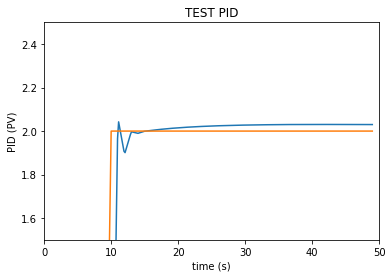

In [150]:
plt.plot(time_smooth, feedback_smooth)
plt.plot(time_list, setpoint_list)
plt.xlim((0, L))
plt.ylim((min(feedback_list)-0.5, max(feedback_list)+0.5))
plt.xlabel('time (s)')
plt.ylabel('PID (PV)')
plt.title('TEST PID')

plt.ylim((2-0.5, 2+0.5))